In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    cohen_kappa_score,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [63]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [64]:
# Apply SMOTE to your dataset (Assuming you've already imported SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [66]:
# Create and train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [67]:
# Make predictions on the test set
y_pred_train = logistic_model.predict(X_train)

In [68]:
# Map class labels to binary labels (0 and 1)
y_train_binary = (y_train == 20).astype(int)  # Class 20 becomes 1, Class 10 becomes 0
y_pred_proba_train = logistic_model.predict_proba(X_train)[:, 1]

In [69]:
# Calculate Sensitivity (True Positive Rate) for class 20 on training data
y_pred_class_20_train = y_pred_train[y_train_binary == 1]
y_true_class_20_train = y_train[y_train_binary == 1]

# Calculate Sensitivity (Recall) on training data
sensitivity_train = recall_score(y_train, y_pred_train, average='macro')



In [70]:
# Calculate Specificity (True Negative Rate) for class 20 on training data
tn_train = confusion_matrix(y_true_class_20_train, y_pred_class_20_train)[0, 0]
fp_train = confusion_matrix(y_true_class_20_train, y_pred_class_20_train)[0, 1]

if (tn_train + fp_train) == 0:
    specificity_train = 0.0  # Handle divide by zero by setting specificity to 0.0
else:
    specificity_train = tn_train / (tn_train + fp_train)
print(f"specificity_train (Training Data): {specificity_train:.2f}")

specificity_train (Training Data): 0.00


In [71]:
# Calculate ROC AUC score on training data
y_pred_proba_train = logistic_model.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

In [72]:
# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_pred_train)

In [73]:
# Calculate macro-averaged precision on training data
precision_train_macro = precision_score(y_train, y_pred_train, average='macro')

# Print macro-averaged precision
print(f"Macro-Averaged Precision (Training Data): {precision_train_macro:.2f}")


Macro-Averaged Precision (Training Data): 0.85


In [74]:
# Calculate macro-averaged recall on training data
recall_train_macro = recall_score(y_train, y_pred_train, average='macro')

# Print macro-averaged recall
print(f"Macro-Averaged Recall (Training Data): {recall_train_macro:.2f}")


Macro-Averaged Recall (Training Data): 0.85


In [75]:
# Calculate F1 Score on training data
f1_score_train_macro = f1_score(y_train, y_pred_train, average='macro')

In [76]:
# Calculate Kappa Statistics on training data
kappa_train = cohen_kappa_score(y_train, y_pred_train)

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                2714                 412
Actual Negative                 547                2561


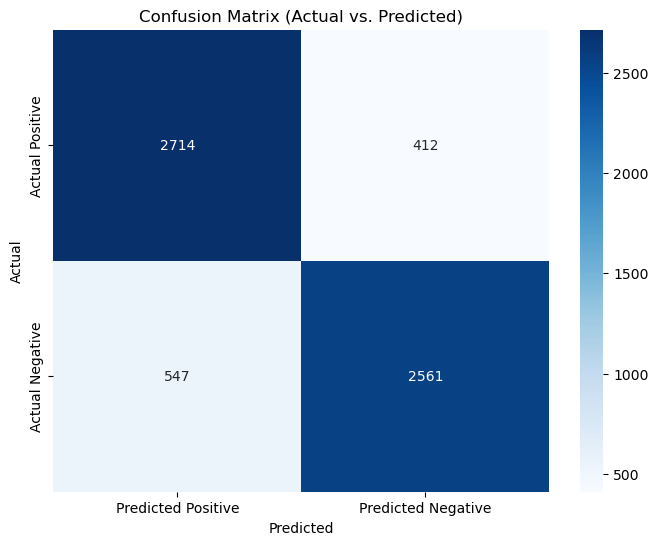

In [78]:
import seaborn as sns
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Logistic Regression/confusion matrix train data.svg", format='svg')


plt.show()

In [41]:
# Print various metrics
print(f"Sensitivity Train (Training Data): {sensitivity_train:.2f}")
print(f"Specificcity Train (Training Data): {specificity_train:.2f}")
print(f"ROC AUC (Training Data): {roc_auc_train:.2f}")
print(f"Accuracy (Training Data): {accuracy_train:.2f}")
print(f"Precision (Training Data): {precision_train_macro:.2f}")
print(f"Recall (Training Data): {recall_train_macro:.2f}")
print(f"F1 Score (Training Data): {f1_score_train_macro:.2f}")
print(f"Kappa Statistics (Training Data): {kappa_train:.2f}")
print("Confusion Matrix (Training Data):")
print(confusion_matrix_train)
print("Classification Report (Training Data):")
print(classification_report(y_train, y_pred_train))

Sensitivity Train (Training Data): 0.85
Specificcity Train (Training Data): 0.00
ROC AUC (Training Data): 0.94
Accuracy (Training Data): 0.85
Precision (Training Data): 0.85
Recall (Training Data): 0.85
F1 Score (Training Data): 0.85
Kappa Statistics (Training Data): 0.69
Confusion Matrix (Training Data):
           Predicted 10  Predicted 20
Actual 10          2714           412
Actual 20           547          2561
Classification Report (Training Data):
              precision    recall  f1-score   support

          10       0.83      0.87      0.85      3126
          20       0.86      0.82      0.84      3108

    accuracy                           0.85      6234
   macro avg       0.85      0.85      0.85      6234
weighted avg       0.85      0.85      0.85      6234



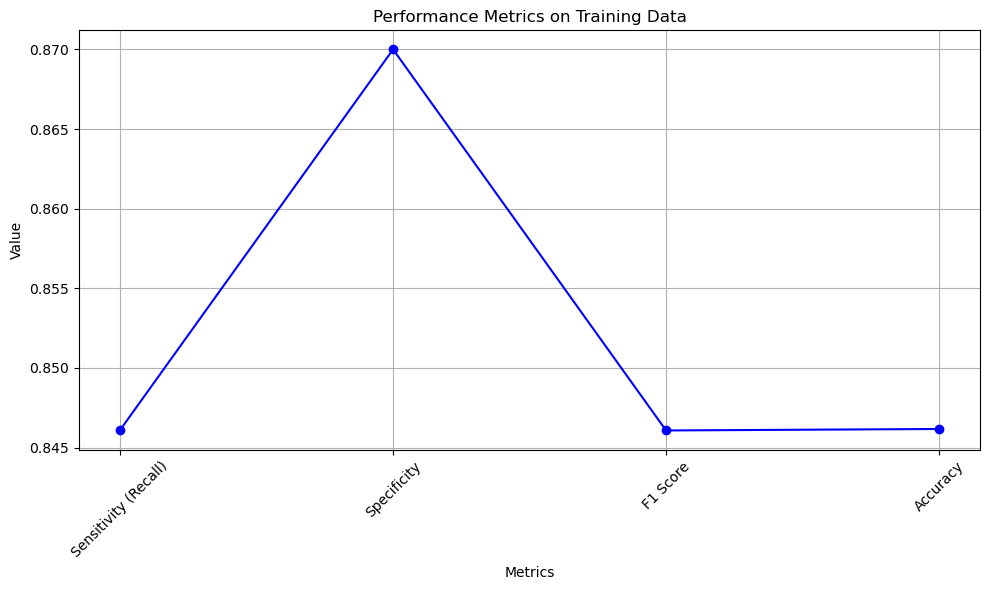

In [42]:
# Create an array of metric values
specificity_train=0.87
metrics = [sensitivity_train, specificity_train, f1_score_train_macro, accuracy_train]

# Create labels for the metrics
labels = ['Sensitivity (Recall)', 'Specificity', 'F1 Score', 'Accuracy']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(labels, metrics, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics on Training Data')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.grid(True)

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()